In [30]:
from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise_array, generate_noise
from src.preprocessing import process_image, process_video
from src.gradient_descent import find_default_params
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from tqdm import tqdm
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['text.usetex'] = True

In [31]:
def draw_gaussian_at(support, sd=1.0, height=1.0, 
        xpos=0.0, ypos=0.0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    gaussian = np.exp((-support ** 2.0) / (2 * sd ** 2.0))
    gaussian /= gaussian.max()
    gaussian *= height
    return ax.plot(gaussian + xpos, support + ypos, **kwargs)

In [32]:
X = np.arange(1,20)
F = np.log(X)
Y = np.random.normal(F, 0.2)

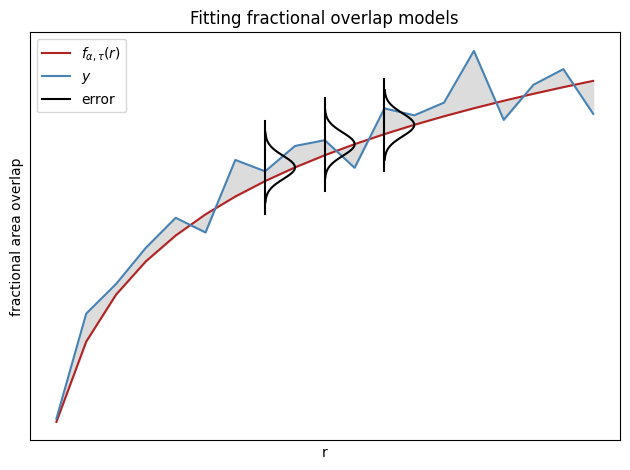

In [45]:
plt.plot(X, F, color='firebrick', label=r'$f_{\alpha,\tau}(r)$')
plt.plot(X, Y, color='steelblue', label=r'$y$')
plt.fill_between(X, Y, F, color='gainsboro')

for x,y in zip(X[8:13:2], F[8:13:2]):
    draw_gaussian_at(np.linspace(-0.3, 0.3, 50), sd=0.1, height=1, xpos=x-1, ypos=y, color='black')
    if x == 9:
        plt.plot(np.linspace(x-1, x-1, 50), np.linspace(y+-0.4, y+0.4, 50), color='black', label='error')
    else:
        plt.plot(np.linspace(x-1, x-1, 50), np.linspace(y+-0.4, y+0.4, 50), color='black')

plt.xticks([])
plt.yticks([])
plt.title('Fitting fractional overlap models')
plt.xlabel('r')
plt.ylabel('fractional area overlap')
plt.tight_layout()
plt.legend()
plt.show()